<a href="https://colab.research.google.com/github/Champoo200/IA_DataScience/blob/master/analisis_normalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Starmodels.api** provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.
And *warnings* is to ignore certine kind of errors

**Scipy privides algoritms and tools, algorims, special functions etc.**

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns

import statsmodels.api as sm  

from scipy import stats
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Import Csv from url and this data set is about a town, !KUNG SAN in the desert of Kalahari

In [ ]:

url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
data = pd.read_csv(url)
print(data.info())
data.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


Is always important print the data set to saw de csv and start working with

In [ ]:
clean_dat  = data[(data.age > 15) & (data.male == 0) ]
weight  = data["weight"]

In [ ]:
clean_dat

,height,weight,age,male
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
4,145.415,41.276872,51.0,0
6,149.225,38.243476,32.0,0
8,147.955,34.869885,19.0,0
...,...,...,...,...
529,146.050,39.405805,37.4,0
533,152.400,40.823280,49.0,0
534,162.560,47.031821,27.0,0
537,142.875,34.246196,31.0,0


Ahora utilizamos Scipy para obtener la normal (mu), la desviacion estandar (sigma) ademas que utilizamos la funcion *fit* para reajustar la funcion y disminuir el error.

In [ ]:
mu, sigma = stats.norm.fit(weight)

Now we add the teoric values of the normal and the observing range

In [ ]:
x_hat = np.linspace(min(weight), max(weight), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

Now we gonna make a graf

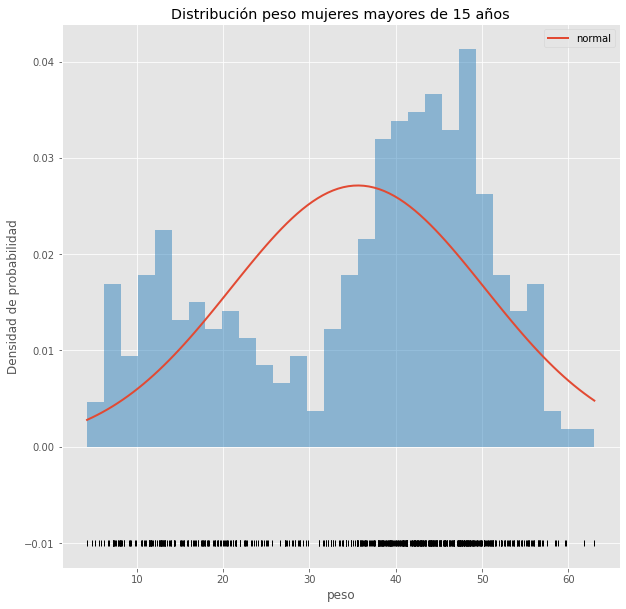

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=weight, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(weight, np.full_like(weight, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();